<a href="https://colab.research.google.com/github/ziaiemahsa/Digit-Recognizer/blob/main/NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=SteelBlue><b>Building a Neural Network from Scratch using Numpy and Math Libraries for the MNIST dataset of handwritten digits </b></font>

####<b>Code Description:</b>
Implemented a simple neural network and trained it on the MNIST dataset.

Input layer 784 units ->  hidden layer 10 units with ReLU activation -> output layer 10 units for ten digit classes with softmax activation.

softmax:
1. The naive softmax involves calculating the exponential of each element in the input array Z, followed by dividing each element by the sum of all exponentials. This implementation of the softmax function is straightforward but can result in numerical instability. Overflow errors can occur if Z contains very large elements due to the rapid growth of the exponential function, potentially exceeding the representable range of the data type. Similarly, underflow errors may arise if all elements in Z are very small, causing the sum to approach zero and leading to a loss of precision when dividing by a small number.

2. In the improved stability softmax approach, the maximum value in Z is subtracted from each element before computing the exponentials. This adjustment is made to enhance numerical stability by preventing overflow errors that can occur when exponentiating large numbers, potentially leading to inaccurate results. By ensuring that the largest exponent becomes zero, the relative probabilities remain unchanged while improving numerical stability. This method is preferable in practice, particularly when dealing with large numbers in Z, as it mitigates overflow errors and enhances the reliability of the results obtained through softmax calculation.

#### Dataset:
- https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv


In [1]:
# downlload the data from drive
! gdown --id 1nGtuOv94-z00oduoEbXmZOXs-OR0G8zc
# unzip the data
! unzip digit-recognizer.zip
# detele unnecessary files
!rm -rf __MACOSX
# path to the data
data_path = '/content/digit-recognizer/train.csv'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nGtuOv94-z00oduoEbXmZOXs-OR0G8zc
To: /content/digit-recognizer.zip
100% 15.6M/15.6M [00:00<00:00, 165MB/s]
Archive:  digit-recognizer.zip
   creating: digit-recognizer/
  inflating: __MACOSX/._digit-recognizer  
  inflating: digit-recognizer/test.csv  
  inflating: __MACOSX/digit-recognizer/._test.csv  
  inflating: digit-recognizer/train.csv  
  inflating: __MACOSX/digit-recognizer/._train.csv  
  inflating: digit-recognizer/sample_submission.csv  
  inflating: __MACOSX/digit-recognizer/._sample_submission.csv  


### <font color=black><b>NN for MINST with NumPy and Math</b></font>

In [2]:
## Importing the necessary libraries and dependencies
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting

In [3]:
# Constants
IMAGE_SIZE = 28 * 28  # Size of each input image (28x28 pixels)
NUM_CLASSES = 10  # Number of classes (digits 0-9)

def load_data(data_path):
    """Load and preprocess the data."""
    data = pd.read_csv(data_path).values  # Load data from CSV file
    np.random.shuffle(data)  # Shuffle the data to avoid any bias
    X = data[:, 1:] / 255.0  # Extract pixel values and normalize them
    Y = data[:, 0]  # Extract labels
    return X.T, Y  # Transpose X to have features in columns

def initialize_parameters(hidden_units):
    """Initialize weights and biases for the neural network."""
    # Initialize weights and biases for the hidden layer and output layer
    W1 = np.random.randn(hidden_units, IMAGE_SIZE) * 0.01  # Weight matrix for hidden layer
    b1 = np.zeros((hidden_units, 1))  # Bias vector for hidden layer
    W2 = np.random.randn(NUM_CLASSES, hidden_units) * 0.01  # Weight matrix for output layer
    b2 = np.zeros((NUM_CLASSES, 1))  # Bias vector for output layer
    return W1, b1, W2, b2

def ReLU(Z):
    """ReLU activation function."""
    return np.maximum(Z, 0)  # ReLU activation function

def softmax(Z):
    """Softmax activation function."""
    ##  1. Naive Softmax:
    #A = np.exp(Z) / sum(np.exp(Z))
    #return A
    ##  2. Softmax with Improved Stability
    exp_Z = np.exp(Z - np.max(Z))  # Subtracting maximum for numerical stability
    return exp_Z / np.sum(exp_Z, axis=0)  # Return softmax probabilities

def forward_propagation(X, W1, b1, W2, b2):
    """Forward propagation through the neural network."""
    # Perform forward propagation through the network layers
    Z1 = W1.dot(X) + b1  # Compute activation of the hidden layer
    A1 = ReLU(Z1)  # Apply ReLU activation function
    Z2 = W2.dot(A1) + b2  # Compute activation of the output layer
    A2 = softmax(Z2)  # Apply softmax activation function
    return Z1, A1, Z2, A2  # Return activations for each layer

def compute_cost(A2, Y):
    """Compute the cross-entropy cost."""
    m = Y.shape[0]  # Number of training examples
    # Compute cross-entropy cost
    log_probs = -np.log(A2[Y, np.arange(m)])  # Log probabilities of predicted classes
    return np.sum(log_probs) / m  # Average cross-entropy cost over all examples

def backward_propagation(X, Y, Z1, A1, Z2, A2, W2):
    """Backward propagation to compute gradients."""
    m = Y.shape[0]  # Number of training examples
    one_hot_Y = np.zeros((NUM_CLASSES, m))  # Initialize one-hot encoded labels
    one_hot_Y[Y, np.arange(m)] = 1  # Set true labels to 1 in one-hot encoding

    # Compute gradients using backpropagation
    dZ2 = A2 - one_hot_Y  # Compute gradient of the output layer
    dW2 = (1 / m) * np.dot(dZ2, A1.T)  # Gradient of weights for output layer
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # Gradient of biases for output layer
    dZ1 = np.dot(W2.T, dZ2) * (Z1 > 0)  # Compute gradient of the hidden layer
    dW1 = (1 / m) * np.dot(dZ1, X.T)  # Gradient of weights for hidden layer
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # Gradient of biases for hidden layer
    return dW1, db1, dW2, db2  # Return gradients

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    """Update parameters using gradient descent."""
    # Update parameters using gradient descent
    W1 -= learning_rate * dW1  # Update weights for hidden layer
    b1 -= learning_rate * db1  # Update biases for hidden layer
    W2 -= learning_rate * dW2  # Update weights for output layer
    b2 -= learning_rate * db2  # Update biases for output layer
    return W1, b1, W2, b2  # Return updated parameters

def train_model(X, Y, hidden_units=10, learning_rate=0.01, iterations=1000):
    """Train the neural network model."""
    # Initialize parameters for the neural network
    W1, b1, W2, b2 = initialize_parameters(hidden_units)
    for i in range(iterations):
        # Perform forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        # Compute cost
        cost = compute_cost(A2, Y)
        # Perform backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W2)
        # Update parameters using gradient descent
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        # Print cost every 100 iterations
        if i % 100 == 0:
            print("Iteration {}, Cost: {:.4f}".format(i, cost))
    return W1, b1, W2, b2  # Return trained parameters

def predict(X, W1, b1, W2, b2):
    """Make predictions using the trained model."""
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)  # Perform forward propagation
    return np.argmax(A2, axis=0)  # Return indices of maximum probabilities

def visualize_prediction(index, X, Y, W1, b1, W2, b2):
    """Visualize a single prediction."""
    # Make prediction for a single example
    prediction = predict(X[:, index:index+1], W1, b1, W2, b2)[0]
    label = Y[index]  # True label of the example
    # Display the image and prediction
    plt.imshow(X[:, index].reshape(28, 28), cmap='gray')  # Reshape and display image
    plt.title("Prediction: {}, Label: {}".format(prediction, label))  # Display prediction and label
    plt.show()


# Load and preprocess the data
X_train, Y_train = load_data(data_path)

# Train the model
W1, b1, W2, b2 = train_model(X_train, Y_train, hidden_units=10, learning_rate=0.1, iterations=1000)

Iteration 0, Cost: 2.3026
Iteration 100, Cost: 1.5890
Iteration 200, Cost: 0.6721
Iteration 300, Cost: 0.5043
Iteration 400, Cost: 0.4288
Iteration 500, Cost: 0.3872
Iteration 600, Cost: 0.3599
Iteration 700, Cost: 0.3402
Iteration 800, Cost: 0.3252
Iteration 900, Cost: 0.3134


Enter the index of the image to visualize (0-59999): 76


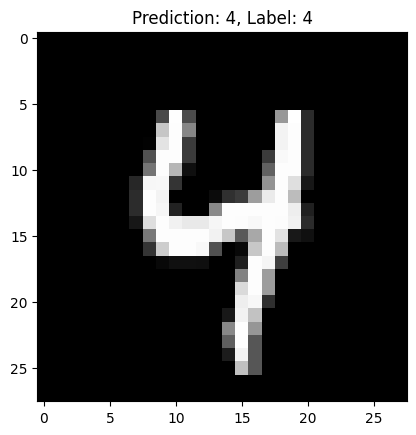

In [4]:
# Prompt user to select an image to Visualize a single prediction
image_index = int(input("Enter the index of the image to visualize (0-59999): "))
visualize_prediction(image_index, X_train, Y_train, W1, b1, W2, b2)